In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import random
from sklearn.metrics import mean_squared_error
from statistics import median

In [30]:
img = cv2.imread('Elaine.bmp',0)

In [31]:
def convolve2D(image, kernel, padding=0, strides=1):
  kernel = np.flipud(np.fliplr(kernel))
  
  xKernShape = kernel.shape[0]
  yKernShape = kernel.shape[1]
  xImgShape = image.shape[0]
  yImgShape = image.shape[1]

  xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
  yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
  output = np.zeros((xOutput, yOutput))

  if padding != 0:
    imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
  else:
    imagePadded = image

  for y in range(imagePadded.shape[1]):
    if y > imagePadded.shape[1] - yKernShape:
      break
    if y % strides == 0:
      for x in range(imagePadded.shape[0]):
        if x > imagePadded.shape[0] - xKernShape:
          break
        try:
          if x % strides == 0:
            output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
        except:
          break
  output[output>255]=255
  output[output<0]=0
  
  return output

In [32]:
def guassian_kernel(filter_size):
  ax = np.linspace(-(filter_size - 1) / 2., (filter_size - 1) / 2., filter_size)
  xx, yy = np.meshgrid(ax, ax)

  sigma = 100
  kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))

  return kernel / np.sum(kernel)

In [33]:
def sharpenning(image, filter_size):
  sharpened_image = convolve2D(image, guassian_kernel(filter_size), filter_size//2)
  return sharpened_image

In [34]:
def unsharpenning(image, filter_size, alpha):
  unsharpened_image = image + (alpha * (sharpenning(image, filter_size) - image))
  return unsharpened_image

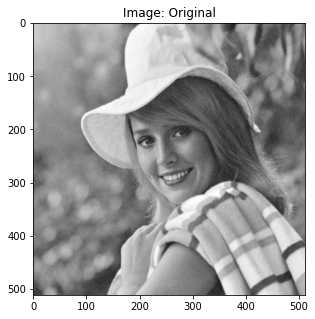

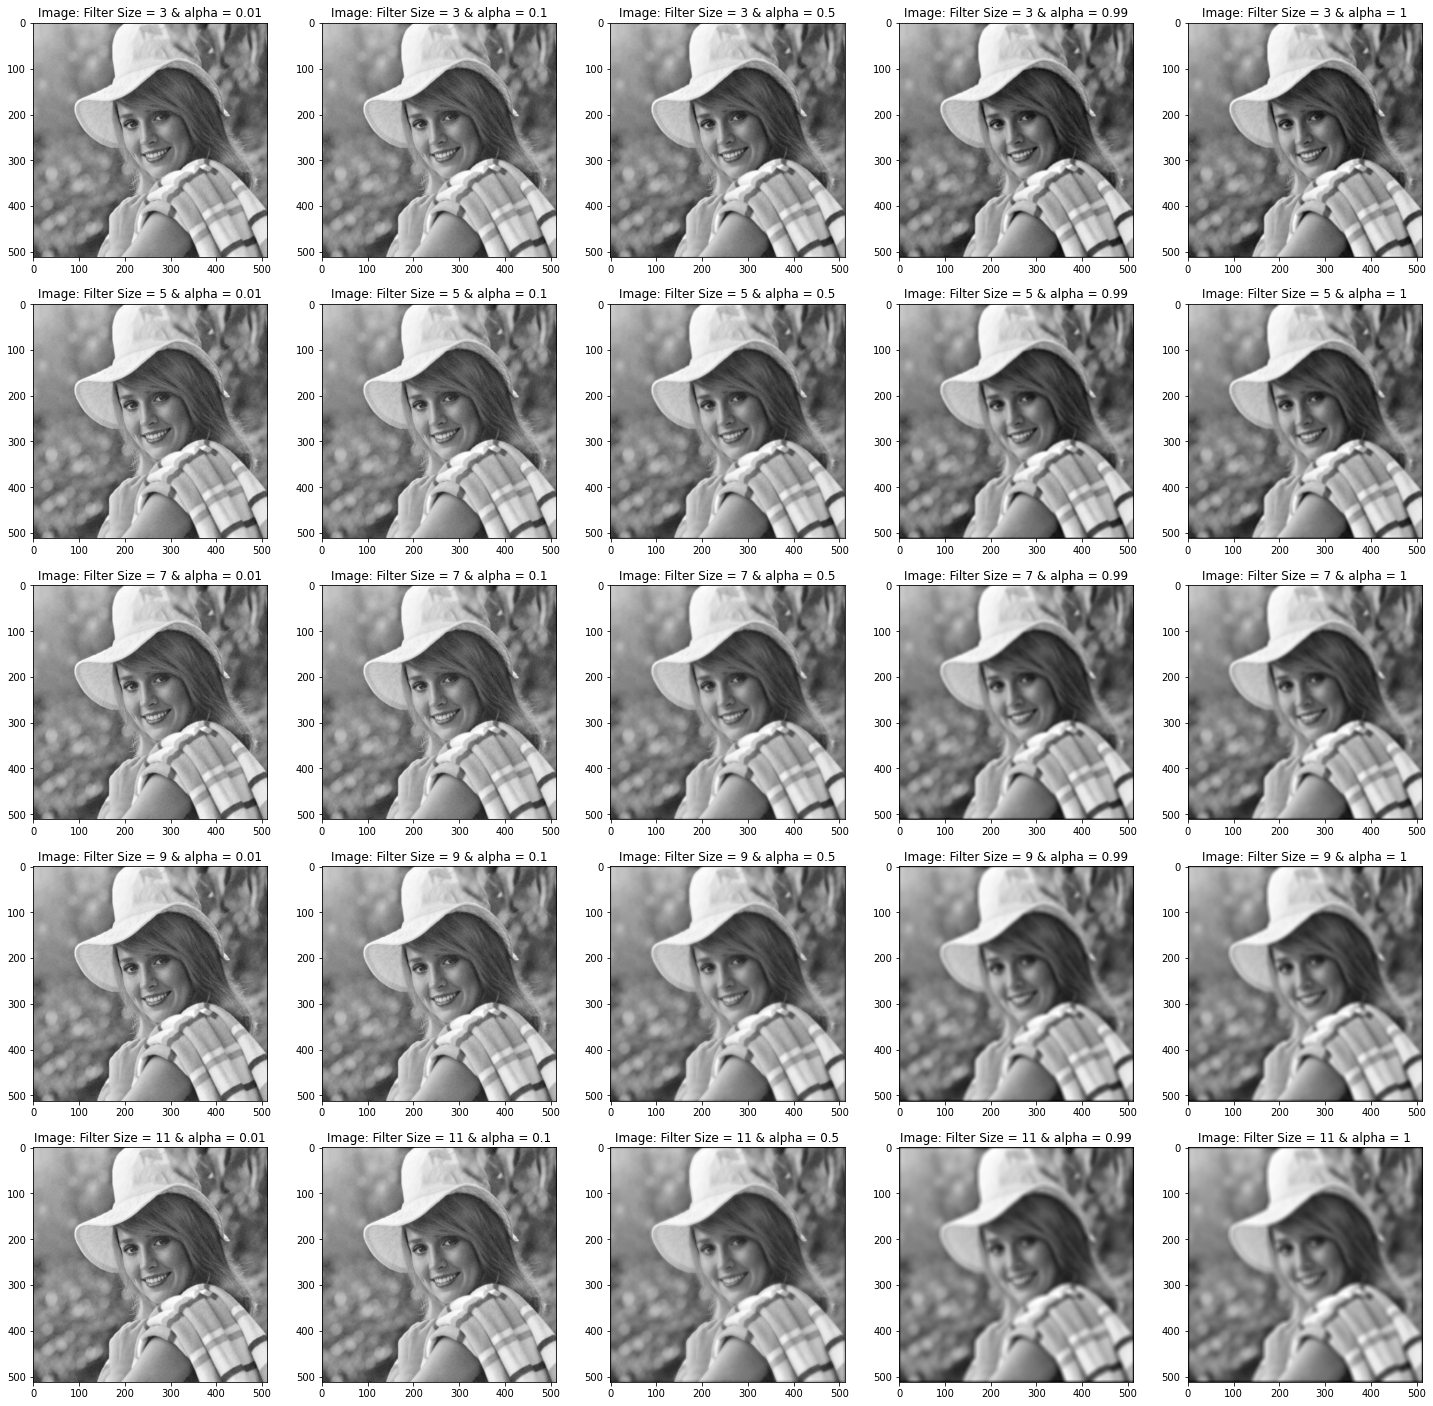

In [35]:
fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

filter_sizes = [3, 5, 7, 9, 11]
alphas = [0.01, 0.1, 0.5, 0.99, 1]

R, C = img.shape
unsharpened_mse = np.zeros((len(filter_sizes), len(alphas)))

fig, plot = plt.subplots(len(filter_sizes), len(alphas), figsize = (5 * len(alphas), 5 * len(filter_sizes)))

for filter_size in range (len(filter_sizes)):
  for alpha in range (len(alphas)):
    sharpenned_image = unsharpenning(img, filter_sizes[filter_size], alphas[alpha])
    plot[filter_size][alpha].imshow(sharpenned_image, cmap='gray')
    plot[filter_size][alpha].set_title("Image: Filter Size = " + str(filter_sizes[filter_size]) + " & alpha = " + str(alphas[alpha]))

    unsharpened_mse[filter_size][alpha] = mean_squared_error(sharpenned_image, img)

In [38]:
# MSE Report

for filter_size in range (len(filter_sizes)):
  for alpha in range (len(alphas)):
    print("Filter Size = " + str(filter_sizes[filter_size]) + " Alpha = " + str(alphas[alpha]) + " MSE = " + str(unsharpened_mse[filter_size][alpha]))
  print("\n")

Filter Size = 3 Alpha = 0.01 MSE = 0.005269786258163034
Filter Size = 3 Alpha = 0.1 MSE = 0.5269786258163036
Filter Size = 3 Alpha = 0.5 MSE = 13.174465645407587
Filter Size = 3 Alpha = 0.99 MSE = 51.64917511625592
Filter Size = 3 Alpha = 1 MSE = 52.697862581630346


Filter Size = 5 Alpha = 0.01 MSE = 0.008644496260631997
Filter Size = 5 Alpha = 0.1 MSE = 0.8644496260632
Filter Size = 5 Alpha = 0.5 MSE = 21.611240651579998
Filter Size = 5 Alpha = 0.99 MSE = 84.72470785045422
Filter Size = 5 Alpha = 1 MSE = 86.44496260631999


Filter Size = 7 Alpha = 0.01 MSE = 0.012066303495930807
Filter Size = 7 Alpha = 0.1 MSE = 1.20663034959308
Filter Size = 7 Alpha = 0.5 MSE = 30.165758739826998
Filter Size = 7 Alpha = 0.99 MSE = 118.26184056361777
Filter Size = 7 Alpha = 1 MSE = 120.66303495930799


Filter Size = 9 Alpha = 0.01 MSE = 0.016101318244163026
Filter Size = 9 Alpha = 0.1 MSE = 1.6101318244163028
Filter Size = 9 Alpha = 0.5 MSE = 40.25329561040757
Filter Size = 9 Alpha = 0.99 MSE = 157.8